In [9]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

### Generate common PID

In [192]:
idx = []
ss = 1000
def generate_PatientID (startIdx, endIdx, size):
    return random.sample(range(startIdx, endIdx), size)
idx = generate_PatientID(ss, 5*ss, ss)


### Generate data for table 1

In [194]:
#Age to be seperately generated for children = 30%, adults = 50%, senior citizens = 20%
def generate_Sex( ss):
    randomNo= np.random.randint(2, size=ss)
    return ['Female' if x != 0 else 'Male' for x in randomNo]

def gen_dist(maxVal, probability, ss, ssRatio):
    return np.random.binomial(n=int(maxVal), p=probability, size =int(ss*ssRatio))

def generate_Table1(maxAge, ss, maxHeight, maxWeight, noise, idx):
    ## todo - add outliers for each category
    age=[]
    age.append(gen_dist(maxAge, 0.007,ss, 0.05 )) #infant
    age.append(gen_dist(maxAge, 0.1,ss, 0.25 )) #children
    age.append(gen_dist(maxAge, 0.3,ss, 0.5 )) #adults
    age.append(gen_dist(maxAge, 0.6,ss, 0.15 )) #senior citizen
    age.append(gen_dist(maxAge, 0.8,ss, 0.05 )) # ss citizen
    
    weight=[]
    weight.append(gen_dist(maxAge, 0.005,ss, 0.05 )) #infant
    weight.append(gen_dist(maxAge, 0.2,ss, 0.25 )) #children
    weight.append(gen_dist(maxAge, 0.5,ss, 0.5 )) #adults
    weight.append(gen_dist(maxAge, 0.6,ss, 0.15 )) #senior citizen
    weight.append(gen_dist(maxAge, 0.6,ss, 0.05 )) # ss citizen
    
    height=[]
    height.append(gen_dist(maxHeight, 0.21,ss, 0.05 )) #infant
    height.append(gen_dist(maxHeight, 0.5,ss, 0.25 )) #children
    height.append(gen_dist(maxHeight, 0.7,ss, 0.5 )) #adults
    height.append(gen_dist(maxHeight, 0.6,ss, 0.15 )) #senior citizen
    height.append(gen_dist(maxHeight, 0.7,ss, 0.05 )) # ss citizen
    
    sex = generate_Sex(ss)
    tableData = np.transpose([idx, sex,np.concatenate(age, axis=None), np.concatenate(weight, axis=None), np.concatenate(height, axis=None)])
    names = ['PatientID','sex','age', 'weight', 'height', 'output']
    print(tableData.shape)
    df = pd.DataFrame(tableData, columns=names)
   
    return df
td1 = generate_Table1(100,
                    ss, 180, 100, 100, idx)
print(td1.head())
td1.to_csv("table1.csv")

(1000, 5)
  PatientID     sex age weight height
0      1483  Female   1      1     44
1      3478  Female   0      0     31
2      2955    Male   1      0     40
3      3597    Male   0      0     37
4      3293  Female   1      1     32


## Visualise table 1

/Users/nidhiranjan/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nidhiranjan/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nidhiranjan/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

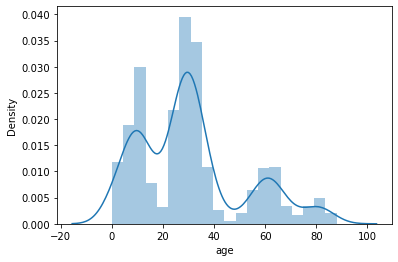

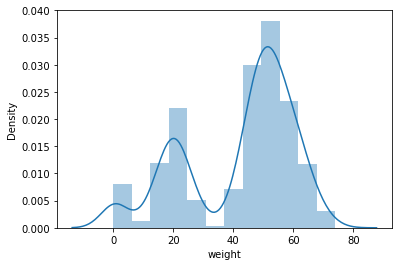

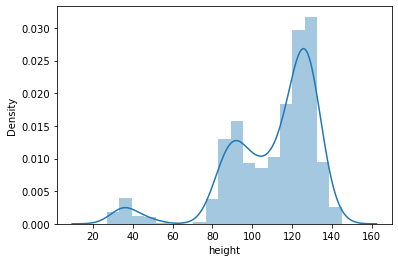

In [59]:
for i in td1.columns:
    if (i=='sex' or i =='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td1[i])

### Generate data for table 2
columns in table 2 - PID, sex, pregnancies

In [107]:
def generate_Sex( ss):
    randomNo= np.random.randint(2, size=ss)
    return ['Female' if x != 0 else 'Male' for x in randomNo]
   
def generate_Table2(maxPreg, ss, noise, idx):
    ## todo - add outliers for each category
    preg=[]
    preg.append(gen_dist(maxPreg, 0.0,ss, 0.05 )) #infant
    preg.append(gen_dist(maxPreg, 0.05,ss, 0.25 )) #children
    preg.append(gen_dist(maxPreg, 0.4,ss, 0.5 )) #adults
    preg.append(gen_dist(maxPreg, 0.05,ss, 0.15 )) #senior citizen
    preg.append(gen_dist(maxPreg, 0.0,ss, 0.05 )) # ss citizen
    sex = generate_Sex(ss)
#     preg = [x for x in zip(preg, sex) if x[1] is'Female' else 0]
    tableData = np.transpose([idx, sex,np.concatenate(preg, axis=None)])
#     print(tableData)
    names = ['PatientID','sex','pregnancies']
    print(tableData.shape)
    df = pd.DataFrame(tableData, columns=names)
    
    return df
   
td2 = generate_Table2(3, ss, 0, idx)
print(td2.describe())
td2.to_csv("table2.csv")

(1000, 3)
       PatientID   sex pregnancies
count       1000  1000        1000
unique      1000     2           4
top         4112  Male           0
freq           1   523         547


### Visualise table 2

/Users/nidhiranjan/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


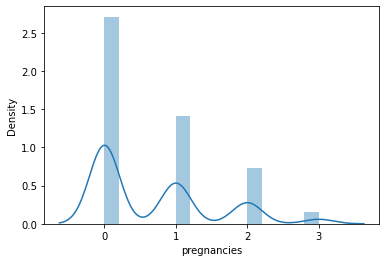

In [61]:
for i in td2.columns:
    if (i=='sex' or i=='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td2[i])

## Generate data for table 3

In [117]:
vision_list = ['normal','blurred_vision','cataract','AMD']
eye_color_list = ['brown','hazel','blue','green','amber']
def generate_table3(n, idx):
    vision = np.random.choice(vision_list, n, p =[0.45,0.3,0.15,0.1])
    eye_color =np.random.choice(eye_color_list,n, p=[0.55,0.15,0.15,0.1,0.05])
    tableData = np.transpose([idx, np.concatenate(eye_color, axis=None),np.concatenate(vision, axis=None)])
    n = ['PatientID','vision','eye_color']
    print(tableData.shape)
    df = pd.DataFrame(tableData, columns=n)
    return df
td3 = generate_table3(ss, idx)
td3.describe()
td3.to_csv("table3.csv")

(1000, 3)


## Visualise table 3

## Generate data for table 4

In [187]:

def generate_table4(maxAge,ss,maxGlucose,maxbp,maxinsulin,maxcholestrol,maxhdl,noise, idx):
    ## todo - add outliers for each category
    
    glucose=[]
    glucose.append(gen_dist(maxGlucose, 0.8,ss, 0.05 )) #infant
    glucose.append(gen_dist(maxGlucose, 0.8,ss, 0.25 )) #children
    glucose.append(gen_dist(maxGlucose, 0.8,ss, 0.5 )) #adults
    glucose.append(gen_dist(maxGlucose, 0.8,ss, 0.15 )) #senior citizen
    glucose.append(gen_dist(maxGlucose, 0.8,ss, 0.05 )) # ss citizen
    
    blood_pressure=[]
    blood_pressure.append(gen_dist(maxbp, 0.75,ss, 0.05 )) #infant
    blood_pressure.append(gen_dist(maxbp, 0.8,ss, 0.25 )) #children
    blood_pressure.append(gen_dist(maxbp, 0.8,ss, 0.5 )) #adults
    blood_pressure.append(gen_dist(maxbp, 0.85,ss, 0.15 )) #senior citizen
    blood_pressure.append(gen_dist(maxbp, 0.99,ss, 0.05 )) # ss citizen
    
    insulin=[]
    insulin.append(gen_dist(maxinsulin, 0.99,ss, 0.05 )) #infant
    insulin.append(gen_dist(maxinsulin, 0.99,ss, 0.25 )) #children
    insulin.append(gen_dist(maxinsulin, 0.99,ss, 0.5 )) #adults
    insulin.append(gen_dist(maxinsulin, 0.99,ss, 0.15 )) #senior citizen
    insulin.append(gen_dist(maxinsulin, 0.99,ss, 0.05 )) # ss citizen
    
    cholestrol=[]
    cholestrol.append(gen_dist(maxcholestrol, 0.70,ss, 0.05 )) #infant
    cholestrol.append(gen_dist(maxcholestrol, 0.70,ss, 0.25 )) #children
    cholestrol.append(gen_dist(maxcholestrol, 0.70,ss, 0.5 )) #adults
    cholestrol.append(gen_dist(maxcholestrol, 0.70,ss, 0.15 )) #senior citizen
    cholestrol.append(gen_dist(maxcholestrol, 0.70,ss, 0.05 )) # ss citizen
    
    HDL=[]
    HDL.append(gen_dist(maxhdl, 0.45,ss, 0.05 )) #infant
    HDL.append(gen_dist(maxhdl, 0.45,ss, 0.25 )) #children
    HDL.append(gen_dist(maxhdl, 0.50,ss, 0.5 )) #adults
    HDL.append(gen_dist(maxhdl, 0.55,ss, 0.15 )) #senior citizen
    HDL.append(gen_dist(maxhdl, 0.50,ss, 0.05 )) # ss citizen
    
    #idx = generate_PatientID(ss, 5*ss, ss)
    #sex = generate_Sex(ss)
    
   
    tableData = np.transpose([idx, np.concatenate(glucose,axis=None), np.concatenate(blood_pressure, axis=None),
                             np.concatenate(insulin, axis=None),np.concatenate(cholestrol, axis=None),np.concatenate(HDL, axis=None)])
    print(tableData.shape)
    names = ['PatientID','glucose', 'blood_pressure', 'insulin','cholestrol','HDL']
    df4 = pd.DataFrame(tableData,columns=names)
   
    return df4
td4 = generate_table4(100, ss, 180,250, 99, 270, 60, 100, idx)
print(td4.describe())
td4.to_csv("table4.csv")

(1000, 6)
         PatientID      glucose  blood_pressure      insulin   cholestrol  \
count  1000.000000  1000.000000     1000.000000  1000.000000  1000.000000   
mean   2980.299000   144.095000      203.680000    97.946000   188.947000   
std    1171.170895     5.319048       12.803262     1.079003     7.432189   
min    1000.000000   128.000000      166.000000    93.000000   164.000000   
25%    1952.500000   140.750000      197.000000    97.000000   184.000000   
50%    3010.500000   144.000000      201.500000    98.000000   189.000000   
75%    3986.000000   148.000000      208.000000    99.000000   194.000000   
max    4998.000000   161.000000      250.000000    99.000000   214.000000   

               HDL  
count  1000.000000  
mean     29.469000  
std       4.329409  
min      14.000000  
25%      27.000000  
50%      29.000000  
75%      32.000000  
max      43.000000  


## Visualise table 4

/Users/nidhiranjan/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nidhiranjan/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nidhiranjan/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

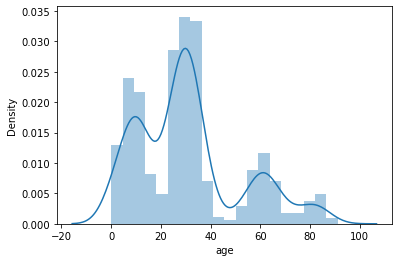

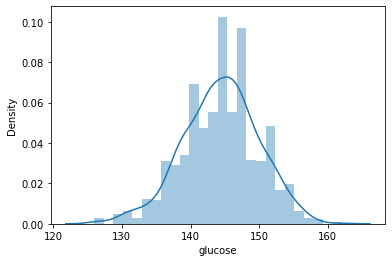

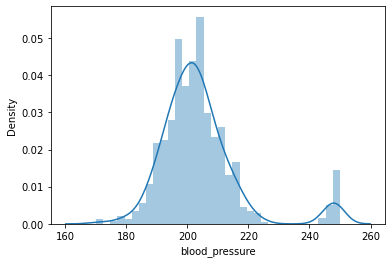

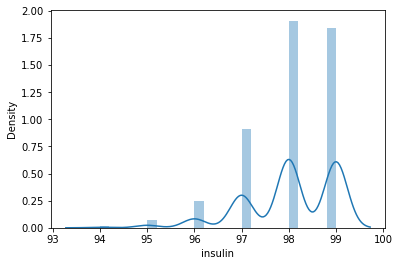

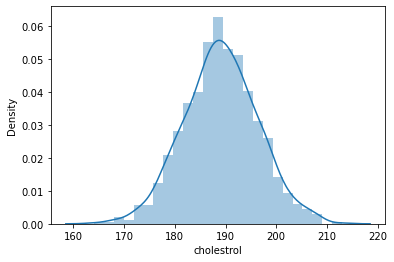

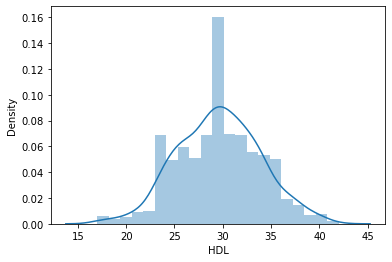

In [70]:
for i in td4.columns:
    if (i=='sex' or i=='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td4[i])

## Generate data for Table 5

In [161]:
def gen_dist(maxVal, probability, ss, ssRatio):
    return np.random.binomial(n=int(maxVal), p=probability, size =int(ss*ssRatio))
def generate_PatientID (startIdx, endIdx, size):
    return random.sample(range(startIdx, endIdx), size)
def generate_table5(ss, noise, idx):
#     print(ss)
    flu=[]
    flu.append(gen_dist(2, 0.3,ss, 0.05 )) #infant
    flu.append(gen_dist(3, 0.4,ss, 0.25 )) #children
    flu.append(gen_dist(3, 0.4,ss, 0.5 )) #adults
    flu.append(gen_dist(3, 0.5,ss, 0.15 )) #senior citizen
    flu.append(gen_dist(4, 0.6,ss, 0.05 )) # ss citizen
    flu = np.concatenate(flu, axis=None)
#     print(flu.shape)
    pne=[]
    pne.append(gen_dist(3, 0.3,ss, 0.05 )) #infant
    pne.append(gen_dist(2, 0.4,ss, 0.25 )) #children
    pne.append(gen_dist(3, 0.3,ss, 0.5 )) #adults
    pne.append(gen_dist(3, 0.2,ss, 0.15 )) #senior citizen
    pne.append(gen_dist(2, 0.3,ss, 0.05 )) # ss citizen
#     print(np.concatenate(pne, axis=None))
    pne = np.concatenate(pne, axis=None)
#     print(pne.shape)
    td=[]
    td.append(gen_dist(3, 0.3,ss, 0.05 )) #infant
    td.append(gen_dist(2, 0.4,ss, 0.25 )) #children
    td.append(gen_dist(3, 0.3,ss, 0.5 )) #adults
    td.append(gen_dist(3, 0.2,ss, 0.15 )) #senior citizen
    td.append(gen_dist(3, 0.4,ss, 0.05 )) # ss citizen
    td = np.concatenate(td, axis=None)
#     print(td.shape)
    tableData = np.transpose([idx, flu, pne, td])
    print(tableData.shape)
    names = ['PatientID','flu','pneumonia', 'td']
    df = pd.DataFrame(tableData, columns=names)
    return df

td5 = generate_table5(ss, 100, idx)
print(td5.describe())
td5.to_csv("table5.csv")

1000
(1000, 4)
         PatientID          flu    pneumonia          td
count  1000.000000  1000.000000  1000.000000  1000.00000
mean   2980.299000     1.269000     0.799000     0.86900
std    1171.170895     0.901916     0.754432     0.75922
min    1000.000000     0.000000     0.000000     0.00000
25%    1952.500000     1.000000     0.000000     0.00000
50%    3010.500000     1.000000     1.000000     1.00000
75%    3986.000000     2.000000     1.000000     1.00000
max    4998.000000     4.000000     3.000000     3.00000


### Visualise table 5

/Users/nidhiranjan/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nidhiranjan/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nidhiranjan/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

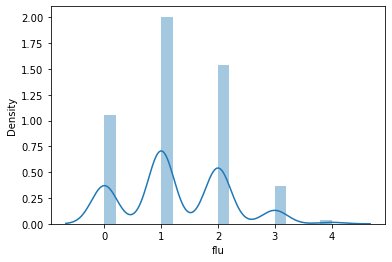

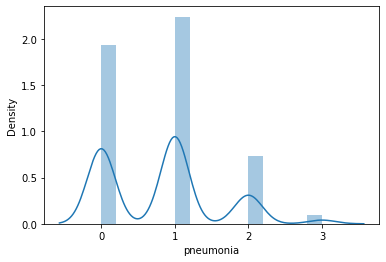

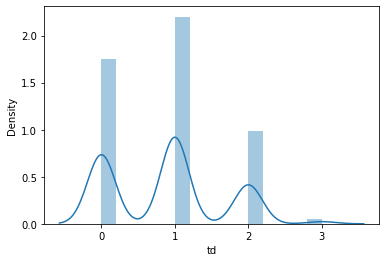

In [163]:
for i in td5.columns:
    if (i=='sex' or i=='PatientID'):
        continue
    else :
        plt.figure()
        sns.distplot(td5[i])

## join multiple tables to have a classification criteria

In [173]:
from functools import reduce
td = [td1, td3, td5]
td_final = pd.merge(td1, td2,td3, td4, td5, how="left", on="PatientID")
td_final.head()


TypeError: merge() got multiple values for argument 'how'

In [191]:
merged_df = pd.merge(td1, td2, on="PatientID")
merged_df1 = pd.merge(merged_df, td3, on="PatientID")
merged_df2 = pd.merge(merged_df1, td4, on="PatientID", sort=False)
# df = pd.merge(merged_df2, td5, on="PatientID")

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [184]:
merged_df1.head()

,PatientID,sex_x,age,weight,height,sex_y,pregnancies,vision,eye_color
0,4650,Female,2,0,40,Male,0,hazel,blurred_vision
1,4725,Female,2,0,44,Female,0,brown,blurred_vision
2,2392,Male,3,1,33,Female,0,hazel,normal
3,2430,Male,0,1,36,Female,0,hazel,AMD
4,2840,Male,2,1,36,Female,0,brown,normal


In [188]:
td4.head()

,PatientID,glucose,blood_pressure,insulin,cholestrol,HDL
0,4650,145,185,99,177,27
1,4725,141,197,99,168,27
2,2392,140,192,97,194,28
3,2430,143,193,98,193,30
4,2840,137,186,99,192,28


In [ ]:
# todo
# define the output label, 
# table 1 - age, (#3)
# table 2 - pregnancies
# table 3 - vision type
# table 4 - glucose (#1), bp, insulin (#2)
# table 5 - pneumonia
